In [42]:
#Samarth Borade
#BTI SEM 10
#C009
#EXP 5 : Implementing parameter tuning and sequential model in python

In [43]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, Dropout
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt

# Step 1: Import the IMDB data
df = pd.read_csv('IMDB Dataset.csv')

df.head(5)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [44]:

# Step 2: Pre-processing and prepare the data
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['review'])
sequences = tokenizer.texts_to_sequences(df['review'])
data = pad_sequences(sequences, maxlen=200)
labels = (df['sentiment'] == 'positive').astype(int)

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Set aside validation data from the training set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [45]:

# Step 3: Building the sequential neural network model without regularization
model_no_reg = Sequential()
model_no_reg.add(Embedding(10000, 32, input_length=200))
model_no_reg.add(Flatten())
model_no_reg.add(Dense(32, activation='relu'))
model_no_reg.add(Dense(1, activation='sigmoid'))


In [46]:

# Step 4: Compile and fit the model to the training dataset
model_no_reg.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_no_reg = model_no_reg.fit(X_train, y_train, epochs=10, batch_size=512, validation_data=(X_val, y_val))


Epoch 1/10
63/63 [==============================] - 8s 120ms/step - loss: 0.6253 - accuracy: 0.6462 - val_loss: 0.4051 - val_accuracy: 0.8376
Epoch 2/10
63/63 [==============================] - 7s 105ms/step - loss: 0.2805 - accuracy: 0.8873 - val_loss: 0.2725 - val_accuracy: 0.8891
Epoch 3/10
63/63 [==============================] - 6s 94ms/step - loss: 0.1604 - accuracy: 0.9450 - val_loss: 0.2749 - val_accuracy: 0.8876
Epoch 4/10
63/63 [==============================] - 6s 92ms/step - loss: 0.0883 - accuracy: 0.9781 - val_loss: 0.2932 - val_accuracy: 0.8849
Epoch 5/10
63/63 [==============================] - 6s 92ms/step - loss: 0.0418 - accuracy: 0.9937 - val_loss: 0.3228 - val_accuracy: 0.8835
Epoch 6/10
63/63 [==============================] - 6s 91ms/step - loss: 0.0197 - accuracy: 0.9985 - val_loss: 0.3509 - val_accuracy: 0.8830
Epoch 7/10
63/63 [==============================] - 5s 85ms/step - loss: 0.0107 - accuracy: 0.9995 - val_loss: 0.3747 - val_accuracy: 0.8825
Epoch 8/10


In [51]:

# Step 3: Building the sequential neural network model with L2 regularization

reg_strength = 0.02  # Adjust the regularization strength here
model_with_reg = Sequential()
model_with_reg.add(Embedding(10000, 32, input_length=200))
model_with_reg.add(Flatten())
model_with_reg.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(reg_strength)))
model_with_reg.add(Dense(1, activation='sigmoid'))

# Step 4: Compile and fit the model to the training dataset
model_with_reg.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_with_reg = model_with_reg.fit(X_train, y_train, epochs=10, batch_size=512, validation_data=(X_val, y_val))


Epoch 1/10
63/63 [==============================] - 8s 122ms/step - loss: 0.8666 - accuracy: 0.5748 - val_loss: 0.6472 - val_accuracy: 0.7215
Epoch 2/10
63/63 [==============================] - 7s 110ms/step - loss: 0.5239 - accuracy: 0.8318 - val_loss: 0.4374 - val_accuracy: 0.8684
Epoch 3/10
63/63 [==============================] - 6s 97ms/step - loss: 0.3931 - accuracy: 0.8842 - val_loss: 0.3774 - val_accuracy: 0.8840
Epoch 4/10
63/63 [==============================] - 6s 98ms/step - loss: 0.3387 - accuracy: 0.9022 - val_loss: 0.3549 - val_accuracy: 0.8848
Epoch 5/10
63/63 [==============================] - 6s 98ms/step - loss: 0.3070 - accuracy: 0.9134 - val_loss: 0.3621 - val_accuracy: 0.8736
Epoch 6/10
63/63 [==============================] - 6s 92ms/step - loss: 0.2832 - accuracy: 0.9231 - val_loss: 0.3338 - val_accuracy: 0.8898
Epoch 7/10
63/63 [==============================] - 6s 95ms/step - loss: 0.2642 - accuracy: 0.9302 - val_loss: 0.3261 - val_accuracy: 0.8899
Epoch 8/10


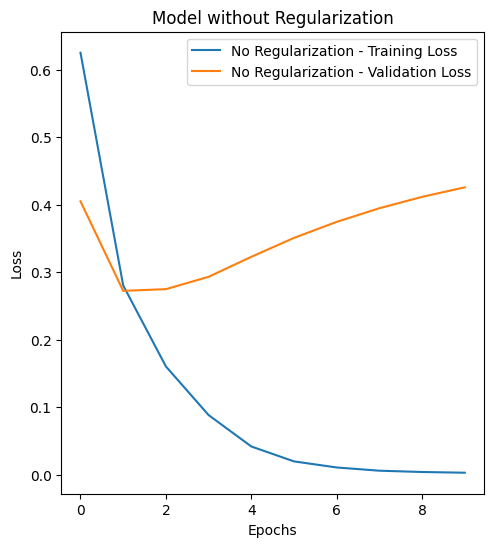

In [52]:

# Plotting training and validation loss for models without and with regularization
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_no_reg.history['loss'], label='No Regularization - Training Loss')
plt.plot(history_no_reg.history['val_loss'], label='No Regularization - Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model without Regularization')
plt.legend()


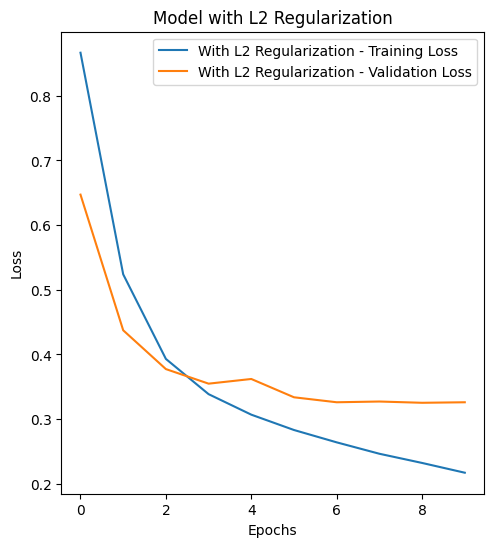

In [53]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 2)
plt.plot(history_with_reg.history['loss'], label='With L2 Regularization - Training Loss')
plt.plot(history_with_reg.history['val_loss'], label='With L2 Regularization - Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model with L2 Regularization')
plt.legend()

plt.show()


In [54]:

# Evaluate models on the test set
loss_no_reg, accuracy_no_reg = model_no_reg.evaluate(X_test, y_test)
loss_with_reg, accuracy_with_reg = model_with_reg.evaluate(X_test, y_test)

print(f'Model without Regularization - Test Loss: {loss_no_reg}, Test Accuracy: {accuracy_no_reg}')
print(f'Model with L2 Regularization - Test Loss: {loss_with_reg}, Test Accuracy: {accuracy_with_reg}')


313/313 [==============================] - 4s 13ms/step - loss: 0.3247 - accuracy: 0.8890
Model without Regularization - Test Loss: 0.42725053429603577, Test Accuracy: 0.8784999847412109
Model with L2 Regularization - Test Loss: 0.3247247636318207, Test Accuracy: 0.8889999985694885
